Using OLS (Ordinary Least Squares) method of stats models, this notebook creates a function that evaluates the performance of the Predicted Total Element Score v Total Component Score model by:
1. calculating the R^2 value
2. calculating the root mean squared error between actual vs predicted
3. Plotting the line of best fit


In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

#Read in all data from file
scores = pd.read_csv('performances.csv')

#If needed, here's how to change missing values to null & drop
#First replace the term with NaN. In this case, '?' represens missing values
# - scores.replace('?', np.nan, inplace = True)
#Then drop NaNs, reset index, and drop unecessary columns by assigning a new variable
# - scores_df = scores.dropna().reset_index().drop(['...], axis=1)

#Rids unnecessary columns
scores_df = scores.drop(['performance_id','competition','program','name','nation','rank','starting_number','total_segment_score','total_deductions'], axis=1)

# Change the datatype of a column as per the requirement
scores_df[['total_element_score','total_component_score']] = scores_df[['total_element_score','total_component_score']].astype(dtype = 'float64')

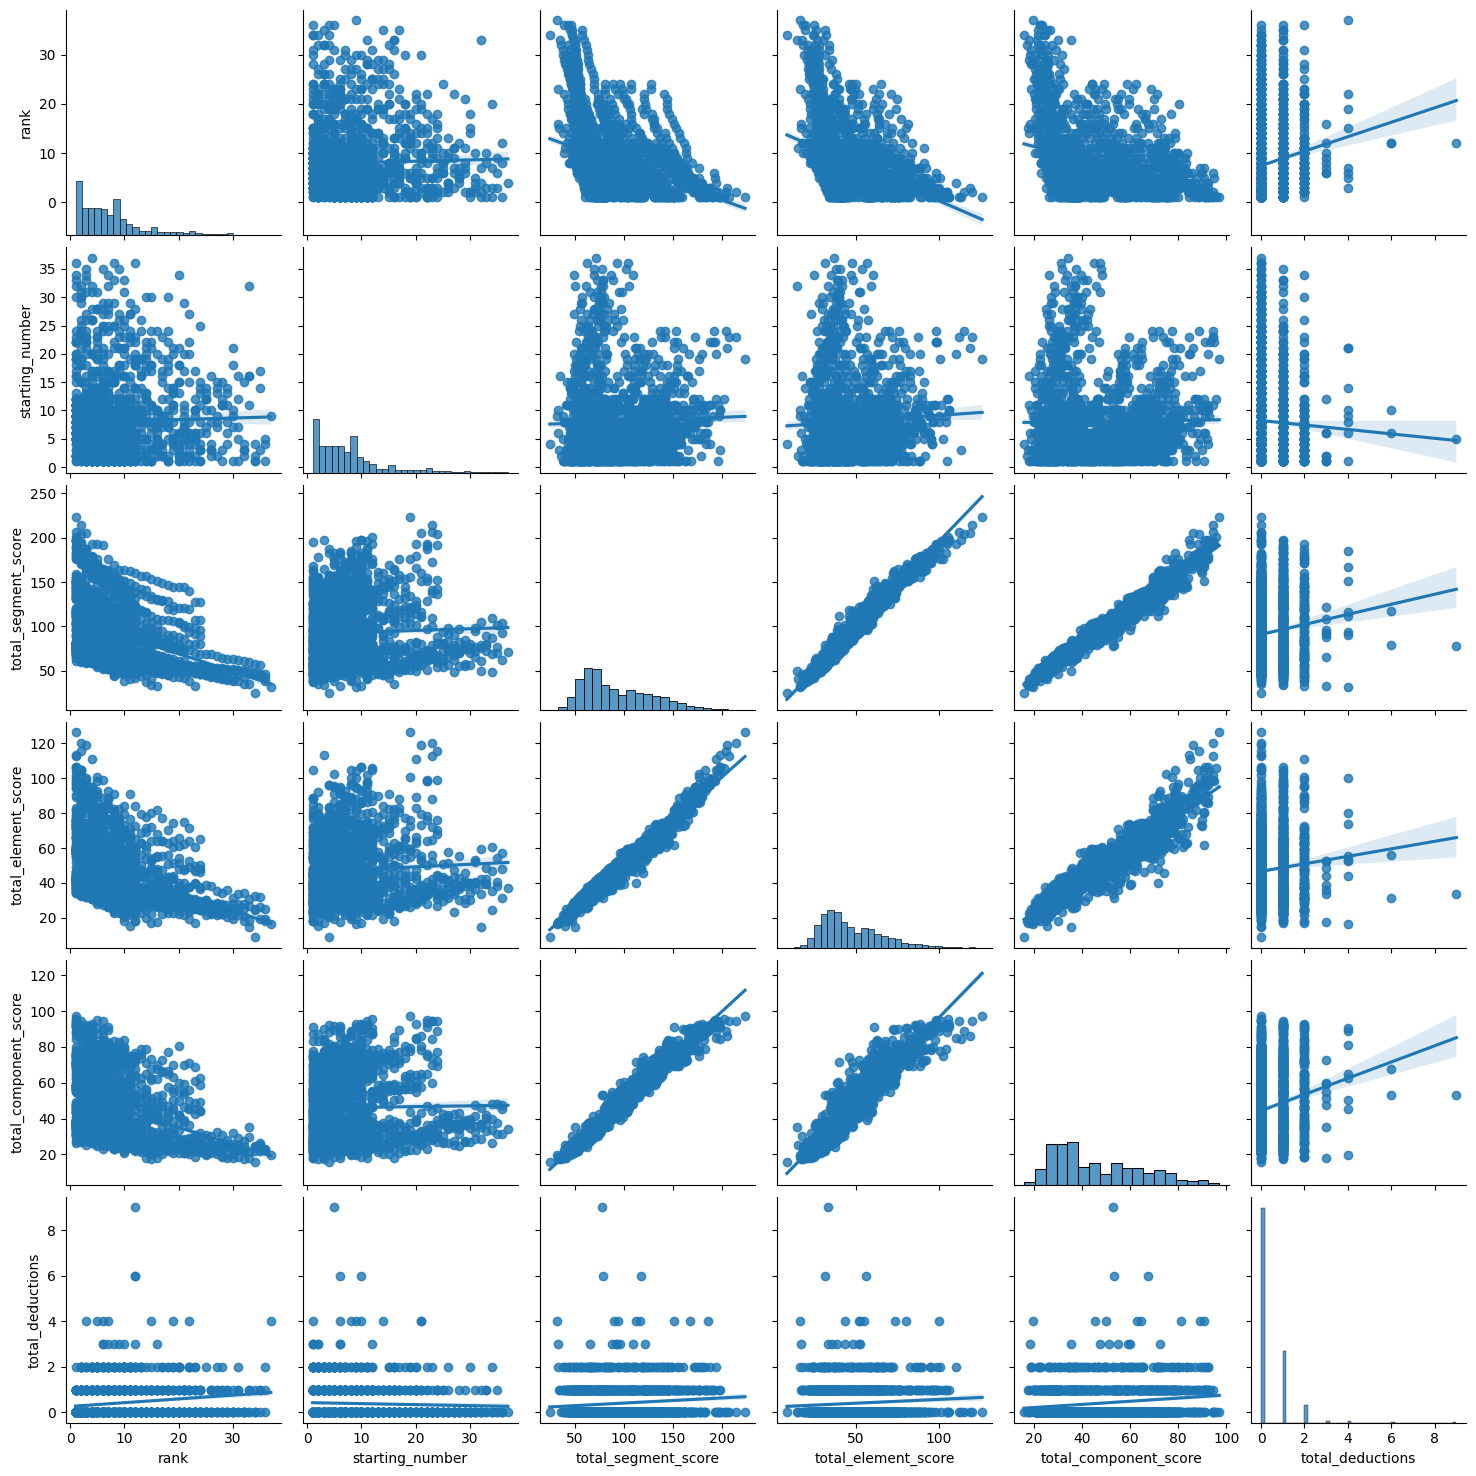

In [2]:
#To display every correlational relationship between all possible inputs:
import seaborn as sns
sns.pairplot(scores, kind = "reg");

In [4]:
#A correlation matrix can be also be used.
#A value of 1 indicates strong positive correlation.
#A value of -1 indicates a strong negative correlation.
#A value of 0 indicates no correlation.

corr_mat = scores.corr(numeric_only = True)
corr_mat

,rank,starting_number,total_segment_score,total_element_score,total_component_score,total_deductions
rank,1.000000,0.027261,-0.377324,-0.393077,-0.342819,0.155704
starting_number,0.027261,1.000000,0.036287,0.054458,0.015439,-0.041497
total_segment_score,-0.377324,0.036287,1.000000,0.985936,0.984388,0.113316
total_element_score,-0.393077,0.054458,0.985936,1.000000,0.941833,0.084764
total_component_score,-0.342819,0.015439,0.984388,0.941833,1.000000,0.176840
total_deductions,0.155704,-0.041497,0.113316,0.084764,0.176840,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

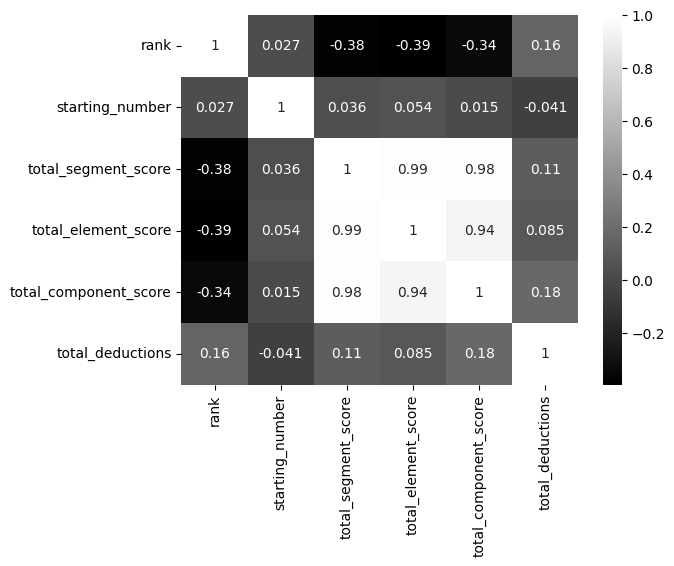

In [5]:
#Similarly, heatmap() can be used to understand these correlations
sns.heatmap(corr_mat, annot=True, cmap='gray')
plt.show

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# wt means weight
def element_prediction(component_wt, element_wt):
    #Adding a constant (intercept team) to the independent variable
    x3_train, x3_test, y3_train, y3_test = train_test_split(component_wt, element_wt)
